# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Read-In

In [3]:
df = pd.read_csv("./DATA/wine_fraud.csv")

# Initial Data Exploration

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

# Data Visualization

<Axes: xlabel='quality', ylabel='count'>

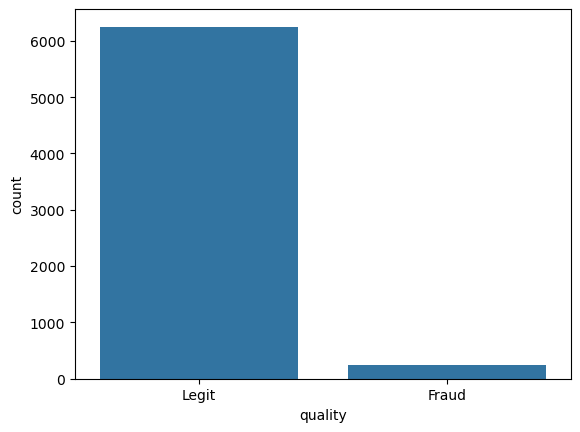

In [6]:
sns.countplot(data=df, x='quality')

<Axes: xlabel='type', ylabel='count'>

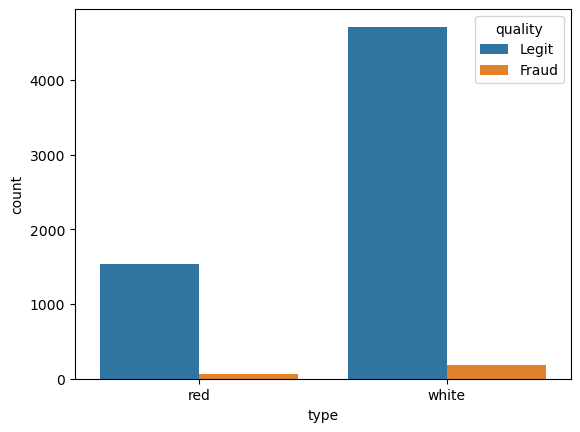

In [7]:
sns.countplot(data=df, hue='quality', x='type')

### Percentage of Fraud in Red Wine and White Wines

#### Red Wine

In [11]:
red_wines = df[df['type']=='red']
frauded_red_wines = red_wines[red_wines['quality']=='Fraud']

percent_fraud_red = (len(frauded_red_wines)/len(red_wines))*100
print(percent_fraud_red)

3.9399624765478425


#### White Wine

In [9]:
white_wines = df[df['type']=='white']
frauded_white_wines = white_wines[white_wines['quality']=='Fraud']

percent_fraud_white = (len(frauded_white_wines)/len(white_wines))*100
print(percent_fraud_white)

3.7362188648427925


### Quality Mapping

In [10]:
df['fraud'] = df['quality'].map({'Legit':0, 'Fraud':1})

### Calculation of Correlation

In [12]:
corr_data = df.corr(numeric_only=True)
fraud_corrs = corr_data['fraud']
fraud_corrs

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
fraud                   1.000000
Name: fraud, dtype: float64

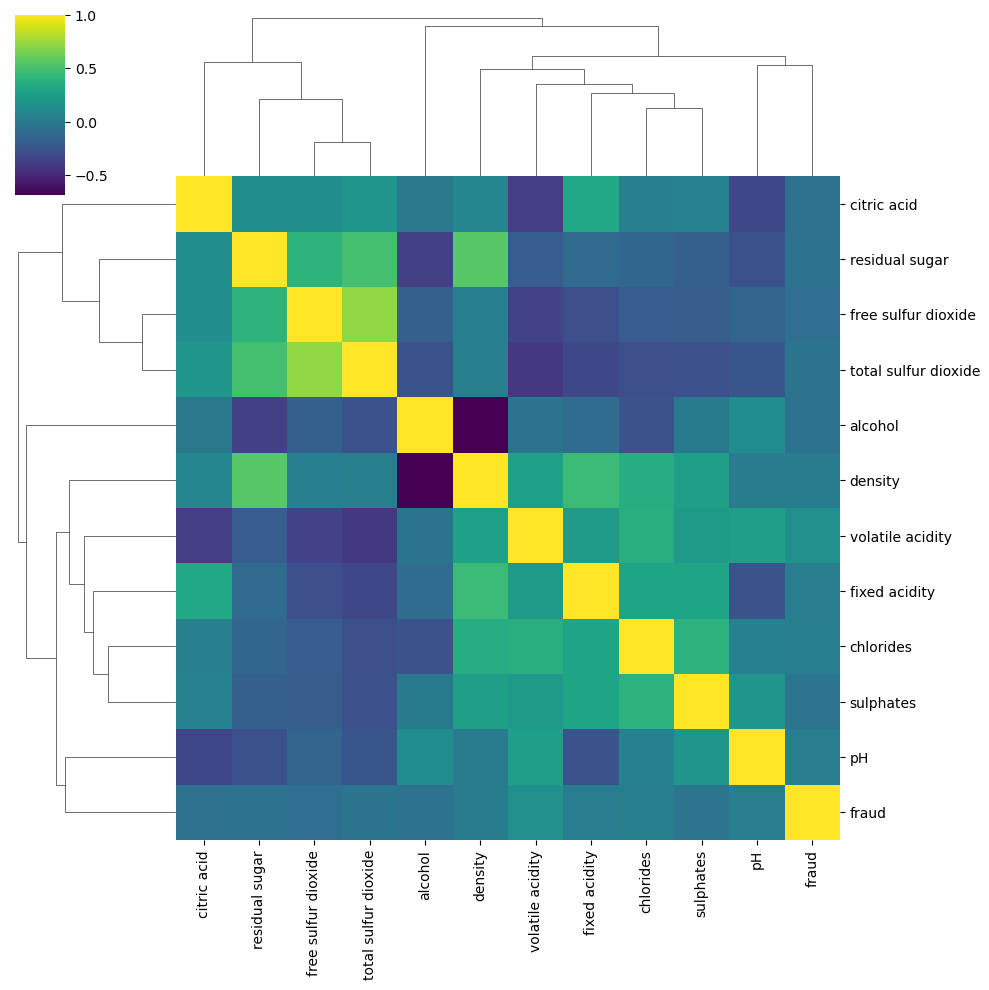

In [14]:
sns.clustermap(corr_data, cmap='viridis')